In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
def toss_die():
    return np.random.randint(1, 7)

In [33]:
np.random.seed(123)
[toss_die() for x in range(10)]

[6, 3, 5, 3, 2, 4, 3, 4, 2, 2]

In [34]:
# Exercise 8.01: Sampling with and without replacement
# 2.
suits = ['hearts', 'diamonds', 'spades', 'clubs']
ranks = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']

In [35]:
# 3.
cards = [rank + "-" + suit for rank in ranks for suit in suits]

In [48]:
# 4.
np.random.choice(cards, size = 5, replace = False)

array(['8-spades', '8-clubs', '4-spades', '10-hearts', '9-spades'],
      dtype='<U14')

In [51]:
# 5.
def deal_hands():
    drawn_cards = np.random.choice(cards, size = 10, replace = False)
    hand1 = drawn_cards[:5]
    hand2 = drawn_cards[5:]
    return hand1, hand2

In [62]:
deal_hands()

(array(['2-clubs', '4-clubs', '2-spades', '9-hearts', '9-spades'],
       dtype='<U14'),
 array(['6-hearts', '6-spades', '4-hearts', 'Jack-hearts', '7-diamonds'],
       dtype='<U14'))

In [63]:
# 6.
def deal_hands2():
    drawn_cards = np.random.choice(cards, size = 10, replace = True)
    hand1 = drawn_cards[:5]
    hand2 = drawn_cards[5:]
    return hand1, hand2

In [71]:
np.random.seed(2)
deal_hands2()

(array(['Jack-hearts', '4-clubs', 'Queen-diamonds', '3-hearts', '6-spades'],
       dtype='<U14'),
 array(['Jack-clubs', '5-spades', '3-clubs', 'Jack-hearts', '2-clubs'],
       dtype='<U14'))

In [72]:
# Probability as a relative frequency
np.random.seed(81)
one_million_dice_tosses = np.random.randint(low = 1, high = 7, size = int(1e6))

In [73]:
one_million_dice_tosses[:10]

array([4, 2, 1, 4, 4, 4, 2, 2, 6, 3])

In [76]:
# A: 2
# B: 6
n_of_A = (one_million_dice_tosses == 2).sum()
prob_of_A = n_of_A / one_million_dice_tosses.shape[0] 
print(n_of_A)
print(prob_of_A)

165950
0.16595


In [77]:
n_of_B = (one_million_dice_tosses == 6).sum()
prob_of_B = n_of_B / one_million_dice_tosses.shape[0] 
print(n_of_B)
print(prob_of_B)

166809
0.166809


In [87]:
n_of_odd = ((one_million_dice_tosses == 1) | (one_million_dice_tosses == 3) | (one_million_dice_tosses == 5)).sum()
prob_of_odd = n_of_odd / one_million_dice_tosses.shape[0] 
print(n_of_odd)
print(prob_of_odd)

501162
0.501162


In [90]:
n_of_comp = ((one_million_dice_tosses < 5)).sum()
prob_of_comp = n_of_comp / one_million_dice_tosses.shape[0] 
print(n_of_comp)
print(prob_of_comp)

666004
0.666004


In [92]:
# Defing random variables
np.random.seed(55)

number_of_dice_tosses = int(1e6)

die_1 = np.random.randint(low = 1, high = 7, size = number_of_dice_tosses)
die_2 = np.random.randint(low = 1, high = 7, size = number_of_dice_tosses)

X = die_1 + die_2


In [94]:
prob_of_X_10 = (X == 10).sum()/X.shape[0]
prob_of_X_10

0.083239

In [95]:
prob_of_X_gtr_5 = (X > 5).sum()/X.shape[0]
prob_of_X_gtr_5

0.721723

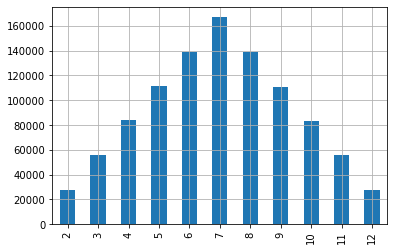

In [97]:
X_s = pd.Series(X)

freq_X = X_s.value_counts()
freq_X.sort_index().plot(kind = 'bar')
plt.grid()

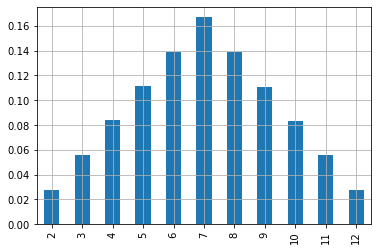

In [99]:
freq_prob_X = X_s.value_counts()/X.shape[0]
freq_prob_X.sort_index().plot(kind = 'bar')
plt.grid()

In [100]:
np.random.seed(97)
ten_coins_one_million_times = np.random.randint(low = 0, high = 2, size = int(10e6)).reshape(-1, 10)